# HousePrice Prediction

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
np.zeros((1,1))

array([[0.]])

In [87]:
df = pd.read_csv('data/HousePrice_preprocessed_train_v1.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,-0.217841,0.75,0.875,1,0.75,1,...,0.0,0.5,0.833333,-0.740634,0.199972,-0.359539,0,1,1,20.85
1,2,20,1,80.0,-0.072032,0.75,0.875,1,0.75,2,...,0.0,0.5,0.833333,1.614603,-0.702722,-0.359539,0,1,1,18.15
2,3,60,1,68.0,0.137173,0.75,0.625,1,0.75,1,...,0.0,0.5,0.833333,-0.740634,-0.081195,-0.359539,0,1,1,22.35
3,4,70,1,60.0,-0.078371,0.75,0.625,1,0.75,3,...,0.0,0.5,0.833333,-0.740634,-0.184783,3.874303,0,1,2,14.00
4,5,60,1,84.0,0.518814,0.75,0.625,1,0.75,2,...,0.0,0.5,0.833333,0.776834,0.540332,-0.359539,0,1,1,25.00


## Train - GradientDecent

In [44]:
# X = All features
tf.set_random_seed(123)
filename_queue = tf.train.string_input_producer(['./data/HousePrice_preprocessed_train_v1.csv'], 
                                                shuffle=False, name='filename_queue')
key, value = tf.TextLineReader(skip_header_lines=1).read(filename_queue)
record_defaults = list(np.zeros((69,1), dtype='float32')) # 69칸
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = tf.train.batch([xy[1:-1], xy[-1:]], batch_size=10)

X = tf.placeholder(tf.float32, shape=[None, 67])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([67,1], name = 'weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = optimizer.minimize(cost)

In [46]:
# with tf.Session() as sess:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# sess.run(tf.local_variables_initializer())
# print(sess.run(W), sess.run(b))

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Step_val = []
W_val = []
Hy_val = []
Cost_val = []

for step in tqdm_notebook(range(15001)):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_batch,
                                              Y: y_batch})

    if step % 100 == 0 or step < 10:      
        W_val.append(sess.run(W))
        Step_val.append(step)
        Hy_val.append(hy_val[0])
        Cost_val.append(cost_val)
        print('step {}: \nhy_val: {}, \ncost_val: {}'.format(step, hy_val[0], cost_val))

coord.request_stop()
coord.join(threads)

step 0: 
hy_val: [40.914604], 
cost_val: 5013.50927734375
step 1: 
hy_val: [3.7404726], 
cost_val: 1169.428466796875
step 2: 
hy_val: [34.3088], 
cost_val: 1905.620361328125
step 3: 
hy_val: [71.64856], 
cost_val: 2678.02978515625
step 4: 
hy_val: [-0.6412042], 
cost_val: 5446.892578125
step 5: 
hy_val: [87.84073], 
cost_val: 3212.37353515625
step 6: 
hy_val: [-1.3405927], 
cost_val: 1387.25390625
step 7: 
hy_val: [-8.558178], 
cost_val: 2987.830810546875
step 8: 
hy_val: [-9.686947], 
cost_val: 2384.05078125
step 9: 
hy_val: [9.830326], 
cost_val: 1710.103271484375
step 100: 
hy_val: [28.269764], 
cost_val: 346.3968811035156
step 200: 
hy_val: [34.375626], 
cost_val: 213.1687469482422
step 300: 
hy_val: [30.415535], 
cost_val: 161.88491821289062
step 400: 
hy_val: [17.96325], 
cost_val: 111.93000793457031
step 500: 
hy_val: [24.396345], 
cost_val: 109.0220718383789
step 600: 
hy_val: [-4.6476035], 
cost_val: 214.2288055419922
step 700: 
hy_val: [21.776325], 
cost_val: 597.190124511718

cost_val: 92.47422790527344
step 12400: 
hy_val: [24.587555], 
cost_val: 45.67559051513672
step 12500: 
hy_val: [6.9433546], 
cost_val: 28.187047958374023
step 12600: 
hy_val: [37.788994], 
cost_val: 74.93650817871094
step 12700: 
hy_val: [21.426134], 
cost_val: 48.230308532714844
step 12800: 
hy_val: [20.835285], 
cost_val: 57.7635383605957
step 12900: 
hy_val: [20.218882], 
cost_val: 219.26345825195312
step 13000: 
hy_val: [11.651306], 
cost_val: 23.243154525756836
step 13100: 
hy_val: [21.93169], 
cost_val: 33.87017822265625
step 13200: 
hy_val: [22.895712], 
cost_val: 30.531841278076172
step 13300: 
hy_val: [6.72598], 
cost_val: 24.65019416809082
step 13400: 
hy_val: [8.064313], 
cost_val: 66.23664855957031
step 13500: 
hy_val: [22.58329], 
cost_val: 60.203758239746094
step 13600: 
hy_val: [16.349024], 
cost_val: 17.288238525390625
step 13700: 
hy_val: [9.118561], 
cost_val: 34.993980407714844
step 13800: 
hy_val: [12.292202], 
cost_val: 73.23653411865234
step 13900: 
hy_val: [7.66

## Train - AdamOptimizer

In [94]:
# X = All features
tf.set_random_seed(123)
filename_queue = tf.train.string_input_producer(['./data/HousePrice_preprocessed_train_v1.csv'], 
                                                shuffle=False, name='filename_queue')
key, value = tf.TextLineReader(skip_header_lines=1).read(filename_queue)
record_defaults = list(np.zeros((69,1), dtype='float32')) # 69칸
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = tf.train.batch([xy[1:-1], xy[-1:]], batch_size=10)

X = tf.placeholder(tf.float32, shape=[None, 67])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([67,1], name = 'weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [95]:
# with tf.Session() as sess:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# sess.run(tf.local_variables_initializer())
# print(sess.run(W), sess.run(b))

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Step_val = []
W_val = []
Hy_val = []
Cost_val = []

for step in tqdm_notebook(range(1501)):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_batch,
                                              Y: y_batch})

    if step % 100 == 0 or step < 10:      
        W_val.append(sess.run(W))
        Step_val.append(step)
        Hy_val.append(hy_val[0])
        Cost_val.append(cost_val)
        print('step {}: \nhy_val: {}, \ncost_val: {}'.format(step, hy_val[0], cost_val))

coord.request_stop()
coord.join(threads)

step 0: 
hy_val: [12.255462], 
cost_val: 1060.512451171875
step 1: 
hy_val: [25.53722], 
cost_val: 1256.59912109375
step 2: 
hy_val: [8.525099], 
cost_val: 646.3394165039062
step 3: 
hy_val: [-7.747507], 
cost_val: 693.6094970703125
step 4: 
hy_val: [28.290539], 
cost_val: 2220.20654296875
step 5: 
hy_val: [-43.007336], 
cost_val: 1309.930908203125
step 6: 
hy_val: [16.916645], 
cost_val: 790.69189453125
step 7: 
hy_val: [34.11337], 
cost_val: 2491.26171875
step 8: 
hy_val: [-68.99832], 
cost_val: 1877.4537353515625
step 9: 
hy_val: [32.38551], 
cost_val: 1400.1904296875
step 100: 
hy_val: [21.497398], 
cost_val: 148.04185485839844
step 200: 
hy_val: [20.693218], 
cost_val: 19.17597770690918
step 300: 
hy_val: [18.2528], 
cost_val: 25.99064064025879
step 400: 
hy_val: [19.540398], 
cost_val: 9.584470748901367
step 500: 
hy_val: [4.768937], 
cost_val: 20.221099853515625
step 600: 
hy_val: [13.157129], 
cost_val: 16.598491668701172
step 700: 
hy_val: [18.881355], 
cost_val: 31.7198028564

In [23]:
# W_val[-1]

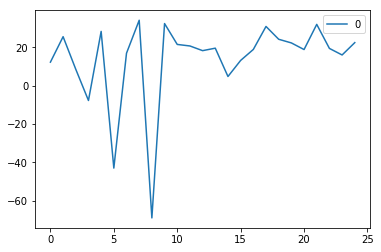

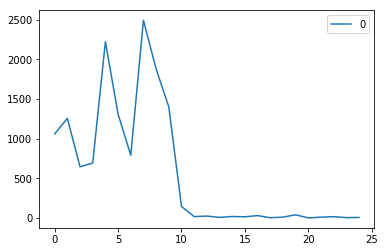

In [96]:
Hy_df = pd.DataFrame(Hy_val)
Cost_df = pd.DataFrame(Cost_val)
Hy_df.plot()
Cost_df.plot()

In [97]:
Cost_df.min()

0    2.731302
dtype: float64

In [98]:
result = sess.run(hypothesis, feed_dict={X: df.iloc[:,1:-1]}) * 10000
len(result)

1460

In [99]:
df_result = pd.DataFrame({'Y': df['SalePrice'] * 10000,
                           'Result' : list(result)})
df_result.head(10)

,Y,Result
0,208500.0,[206972.2]
1,181500.0,[196102.25]
2,223500.0,[221228.16]
3,140000.0,[186386.58]
4,250000.0,[276685.06]
5,143000.0,[204966.02]
6,307000.0,[273158.56]
7,200000.0,[260371.55]
8,129900.0,[148413.58]
9,118000.0,[62225.617]


## Prediction

In [65]:
df = pd.read_csv('./data/HousePrice_preprocessed_test_v1.csv')
# df2.info()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1461,20,5,80.0,0.184340,0.75,0.875,1,0.75,1,...,0.0,0.5,0.833333,0.365853,-0.702722,-0.359539,120,1,1,NaN
1,1462,20,1,81.0,0.519702,0.75,0.625,1,0.75,3,...,0.0,0.5,0.833333,2.365433,-0.169985,-0.359539,0,1,1,NaN
2,1463,60,1,74.0,0.464294,0.75,0.625,1,0.75,1,...,0.0,0.5,0.833333,0.934904,-0.199581,-0.359539,0,1,1,NaN
3,1464,60,1,78.0,-0.024105,0.75,0.625,1,0.75,1,...,0.0,0.5,0.833333,2.104618,-0.169985,-0.359539,0,1,1,NaN
4,1465,120,1,43.0,-0.654636,0.75,0.625,4,0.75,1,...,0.0,0.5,0.833333,-0.740634,0.510735,-0.359539,144,1,1,NaN


In [66]:
result = sess.run(hypothesis, feed_dict={X: df.iloc[:,1:-1]})
result

array([[ 9.877872],
       [14.813387],
       [17.826609],
       ...,
       [18.410301],
       [10.692434],
       [23.768248]], dtype=float32)

In [67]:
df2 = pd.read_csv('data/sample_submission.csv')
df2.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [68]:
df2['SalePrice'] = result * 10000
df2.head()

,Id,SalePrice
0,1461,98778.726562
1,1462,148133.875000
2,1463,178266.093750
3,1464,185694.718750
4,1465,169807.359375


In [69]:
df2.to_csv('data/submission_Adam_v1.0.csv', sep=',', index=False, encoding='UTF-8')
! dir data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3EFF-82E2

 C:\Users\student\Dropbox\Anaconda_src\HousePrice\data 디렉터리

2018-11-29  오후 01:54    <DIR>          .
2018-11-29  오후 01:54    <DIR>          ..
2018-11-27  오후 12:19    <DIR>          .ipynb_checkpoints
2018-05-28  오후 02:49            13,370 data_description.txt
2018-11-26  오후 11:37            19,362 data_description_translate.txt
2018-11-27  오전 12:08           131,663 HousePrice_df2
2018-11-27  오후 03:49           506,806 HousePrice_preprocessed_df2.csv
2018-11-27  오후 02:49           349,892 HousePrice_preprocessed_df2_wSalePrice.csv
2018-11-27  오후 03:36               849 HousePrice_preprocessed_df2_wSalePrice_test.csv
2018-11-27  오후 03:38               129 HousePrice_preprocessed_df2_wSalePrice_test2.csv
2018-11-27  오후 03:54               806 HousePrice_preprocessed_df2_wSalePrice_test3.csv
2018-11-28  오전 10:59           406,335 HousePrice_preprocessed_df2_wSalePrice_test4.csv
2018-11-29  오전 11:36           961,622 HousePrice_preprocessed_t